In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy

In [11]:
# KL Divergence for each feature
def kl_divergence(feature_name, dataset):
    neg_feature_data = dataset[dataset['label'] == 0][feature_name] # 负样本数据
    pos_feature_data = dataset[dataset['label'] == 1][feature_name] # 正样本数据

    min_value = min(neg_feature_data.min(), pos_feature_data.min())
    max_value = max(neg_feature_data.max(), pos_feature_data.max())
    # min_value = pos_feature_data.min() if neg_feature_data.min() > pos_feature_data.min() else neg_feature_data.min()
    # max_value = neg_feature_data.max() if neg_feature_data.max() > pos_feature_data.max() else pos_feature_data.max()
    c = 0
    if(c==0):
        plt.hist(neg_feature_data, bins = 10, range=(min_value, max_value), density = True, alpha = 0.5, label = 'neg', color = 'red')
        plt.hist(pos_feature_data, bins = 10, range=(min_value, max_value), density = True, alpha = 0.5, label = 'pos', color = 'blue')
        plt.legend()
        plt.show()
        c = 1
    neg_hist, neg_bin = np.histogram(neg_feature_data, bins = 10, range=(min_value, max_value), density = True)
    pos_hist, pos_bin = np.histogram(pos_feature_data, bins = 10, range=(min_value, max_value), density = True)
    pos_hist[pos_hist == 0] = 1e-7
    neg_hist[neg_hist == 0] = 1e-7
    return entropy(neg_hist, pos_hist, base = 2)


In [9]:
def get_all_kl_divergence(df):
    features =[]
    feature_kl = []
    size = len(df.columns)
    i = 0
    # print(df[df.columns[19944]])
    for feature in df.columns: 
        if feature == 'label' or feature == 'file_id':
            continue
        features.append(feature)
        feature_kl.append(kl_divergence(feature, df))
        i = i + 1
        print('process:{} / {}'.format(i, feature))
    kl_feature_dataset = pd.DataFrame()
    kl_feature_dataset['feature_name'] = features
    kl_feature_dataset['kl_divergence'] = feature_kl
    final = kl_feature_dataset.sort_values('kl_divergence', ascending=False)
    return final

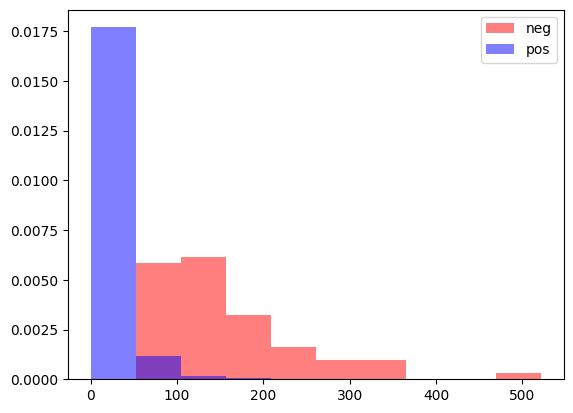

process:1 / GYPE


,feature_name,kl_divergence
0,GYPE,5.867323


In [12]:
# Read the preprocessed data and calculate the KL divergence for each feature
df = pd.read_csv('TCGA_Labeled.csv', index_col = 0)
dd = get_all_kl_divergence(df)
choosed_features = dd[dd['kl_divergence'] > 3].reset_index(drop = True)
choosed_features


In [22]:
# Filtering the choosed 134 features from the original dataset
index_columns = np.append(choosed_features['feature_name'].values, ['label'])
df_choosed = df[index_columns]
df_choosed.to_csv('TCGA_Labeled_Final_Features.csv')

df_choosed.columns


Index(['STX11', 'GYPE', 'ADRB2', 'CD5L', 'ANGPT4', 'GPM6A', 'NCKAP5',
       'CD300LG', 'SGCG', 'KCNA4',
       ...
       'FRMD3', 'EPAS1', 'ARHGAP6', 'PIP5K1B', 'ADRB1', 'ARHGEF15', 'ACTN2',
       'ARHGAP31', 'ERG', 'label'],
      dtype='object', length=135)